In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_dataset.csv")
data

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


# Train-Test-Split

In [3]:
def train_test_split(data,test_ratio):
    np.random.seed(42)
    shuff_ind = np.random.permutation(len(data))
    test_set_len = int(len(data)*test_ratio)
    train_set_ind = shuff_ind[test_set_len:]
    test_set_ind = shuff_ind[:test_set_len]
    train_set = data.iloc[train_set_ind]
    test_set = data.iloc[test_set_ind]   #here iloc is important
    return train_set,test_set

In [4]:
train_set,test_set = train_test_split(data,1/3)

In [5]:
train_set

,YearsExperience,Salary
4,2.3,39892
16,5.2,66030
5,3.0,56643
13,4.2,57082
11,4.1,55795
22,8.0,101303
1,1.4,46206
2,1.6,37732
25,9.1,105583
3,2.1,43526


In [6]:
test_set

,YearsExperience,Salary
27,9.7,112636
15,5.0,67939
23,8.3,113813
17,5.4,83089
8,3.3,64446
9,3.8,57190
28,10.4,122392
24,8.8,109432
12,4.1,56958
0,1.2,39344


In [7]:
x_train = train_set["YearsExperience"]
y_train = train_set["Salary"]
x_test = test_set["YearsExperience"]
y_test = test_set["Salary"]

In [8]:
x_test

27     9.7
15     5.0
23     8.3
17     5.4
8      3.3
9      3.8
28    10.4
24     8.8
12     4.1
0      1.2
Name: YearsExperience, dtype: float64

# Normalization

In [9]:
def min_max_scale(data):
    min = np.min(data)
    max = np.max(data)
    return (data - min)/(max - min)

In [10]:
x_train_n = min_max_scale(x_train)
x_test_n = min_max_scale(x_test)

In [11]:
print(x_train_n , x_test_n)

4     0.097826
16    0.413043
5     0.173913
13    0.304348
11    0.293478
22    0.717391
1     0.000000
2     0.021739
25    0.836957
3     0.076087
21    0.630435
26    0.891304
18    0.500000
29    1.000000
20    0.597826
7     0.206522
10    0.282609
14    0.347826
19    0.510870
6     0.184783
Name: YearsExperience, dtype: float64 27    0.923913
15    0.413043
23    0.771739
17    0.456522
8     0.228261
9     0.282609
28    1.000000
24    0.826087
12    0.315217
0     0.000000
Name: YearsExperience, dtype: float64


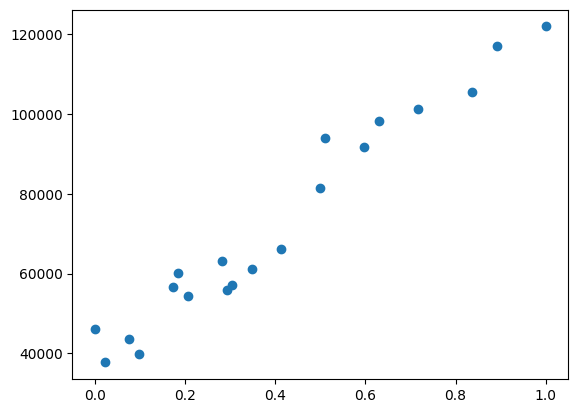

In [12]:
plt.scatter(x_train_n, y_train)

In [13]:
x_train_n = np.array(x_train_n)
y_train = np.array(y_train)

In [14]:
def compute_model_output(w,b,x):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(0,m):
        f_wb[i] = w*x[i] + b
    return f_wb

In [15]:
f_wb = compute_model_output(1,0,x_train_n)
print(f_wb)

[0.09782609 0.41304348 0.17391304 0.30434783 0.29347826 0.7173913
 0.         0.02173913 0.83695652 0.07608696 0.63043478 0.89130435
 0.5        1.         0.59782609 0.20652174 0.2826087  0.34782609
 0.51086957 0.18478261]


In [16]:
def compute_cost(x,y,w,b):
    m = x.shape[0] 
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [17]:
print(compute_cost(x_train_n,y_train,1,0))

2969017094.0536036


print(compute_decent(f_wb,y_train,x_train_n))

In [18]:
def compute_decent(x,y,w,b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [19]:
print(compute_decent(x_train_n,y_train,1,0))

(-36651.34768431002, -72643.64565217393)


In [20]:
def gradient_decent(x,y,w,b,epoch,alpha,compute_cost,compute_decent):
    w = w
    b = b
    for i in range(0,epoch):
        dj_dw,dj_db = compute_decent(x,y,w,b)
        
        #update w and b
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # Print cost every at intervals 1000 times or as many iterations if < 10
        if (i%1000 == 0):
            print("cost = ", compute_cost(x,y,w,b))
            print("w = ",w)
            print("b = ",b)
            print("--------------------------------------------------------------------------------------")
    

In [21]:
gradient_decent(x_train_n,y_train,1,0,10000,0.01,compute_cost,compute_decent) 

cost =  2903201019.235167
w =  367.51347684310025
b =  726.4364565217393
--------------------------------------------------------------------------------------
cost =  50455846.359956115
w =  57775.52176762265
b =  50181.47675760313
--------------------------------------------------------------------------------------
cost =  23425239.293917846
w =  72544.6544036061
b =  43751.23217567458
--------------------------------------------------------------------------------------
cost =  16942123.910637867
w =  79777.56561151019
b =  40601.87264752688
--------------------------------------------------------------------------------------
cost =  15387190.823265025
w =  83319.79849635418
b =  39059.510992569834
--------------------------------------------------------------------------------------
cost =  15014250.2286179
w =  85054.5652385841
b =  38304.15757835521
--------------------------------------------------------------------------------------
cost =  14924802.850936368
w =  85904.14677

# Now fitting Linear Regression

In [22]:
x_train_n = x_train_n.reshape(20,1)
y_train = y_train.reshape(20,1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_n,y_train)

LinearRegression()

In [25]:
y_p = compute_model_output(86672.31424318605,37599.756113753894,x_train_n)

In [26]:
y_train

array([[ 39892],
       [ 66030],
       [ 56643],
       [ 57082],
       [ 55795],
       [101303],
       [ 46206],
       [ 37732],
       [105583],
       [ 43526],
       [ 98274],
       [116970],
       [ 81364],
       [121873],
       [ 91739],
       [ 54446],
       [ 63219],
       [ 61112],
       [ 93941],
       [ 60151]], dtype=int64)

In [27]:
b = model.intercept_
w = model.coef_
print(w,b)

[[86719.55667549]] [37579.18577904]


In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_p)
print(mse/2)

14896675.275040243


In [29]:
cost =  14896675.275040243
w =  86672.31424318605
b =  37599.756113753894